In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
## libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
import glob as gb
import os
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization , ZeroPadding2D , Input , Activation
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [3]:
## check images and encode
check = {"Normal":0 , "Tumor":1}
def getcheck(n):
    for x , y in check.items():
        if n == y:
            return x

In [4]:
Normal_path = "/kaggle/input/siardataset/Siar-dataset/Normal"
Tumor_path = "/kaggle/input/siardataset/Siar-dataset/Tumor"
Siar_path = "/kaggle/input/siardataset/Siar-dataset"

In [5]:
## display num of image in Siar
for folder in os.listdir(Siar_path):
    folder_path = os.path.join(Siar_path , folder)
    files = gb.glob(os.path.join(folder_path , "*.jpg"))
    print(f"for Siar data , there are {len(files)} images in folder {folder}")

for Siar data , there are 3200 images in folder Tumor
for Siar data , there are 3799 images in folder Normal


In [6]:
## show size image in Normal
size = []
for folder in os.listdir(Siar_path):
    folder_path = os.path.join(Siar_path , folder)
    files = gb.glob(os.path.join(folder_path , "*.jpg"))
    for file in files:
        image = cv2.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(512, 512, 3)    4268
(256, 256, 3)    2223
(377, 285, 3)       5
(361, 272, 3)       3
(268, 231, 3)       3
                 ... 
(335, 296, 3)       1
(289, 232, 3)       1
(342, 296, 3)       1
(461, 412, 3)       1
(292, 248, 3)       1
Name: count, Length: 482, dtype: int64

In [7]:
## initial size
s = 225

In [8]:
## make images in same size 

X = []
Y = []
for folder in os.listdir(Siar_path):
    folder_path = os.path.join(Siar_path , folder)
    files = gb.glob(os.path.join(folder_path , "*.jpg"))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X.append(list(image_array))
        Y.append(check[folder])
        
X = np.array(X)/255.0
Y = np.array(Y)

In [9]:
## split X and Y
x_train , x_test , y_train , y_test = train_test_split(X , Y , random_state = 42 , test_size = 0.2)
x_train , x_val , y_train , y_val = train_test_split(x_train , y_train , random_state = 42 , test_size = 0.2)

In [10]:
## data augmentaition
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True
)

datagen.fit(x_train)

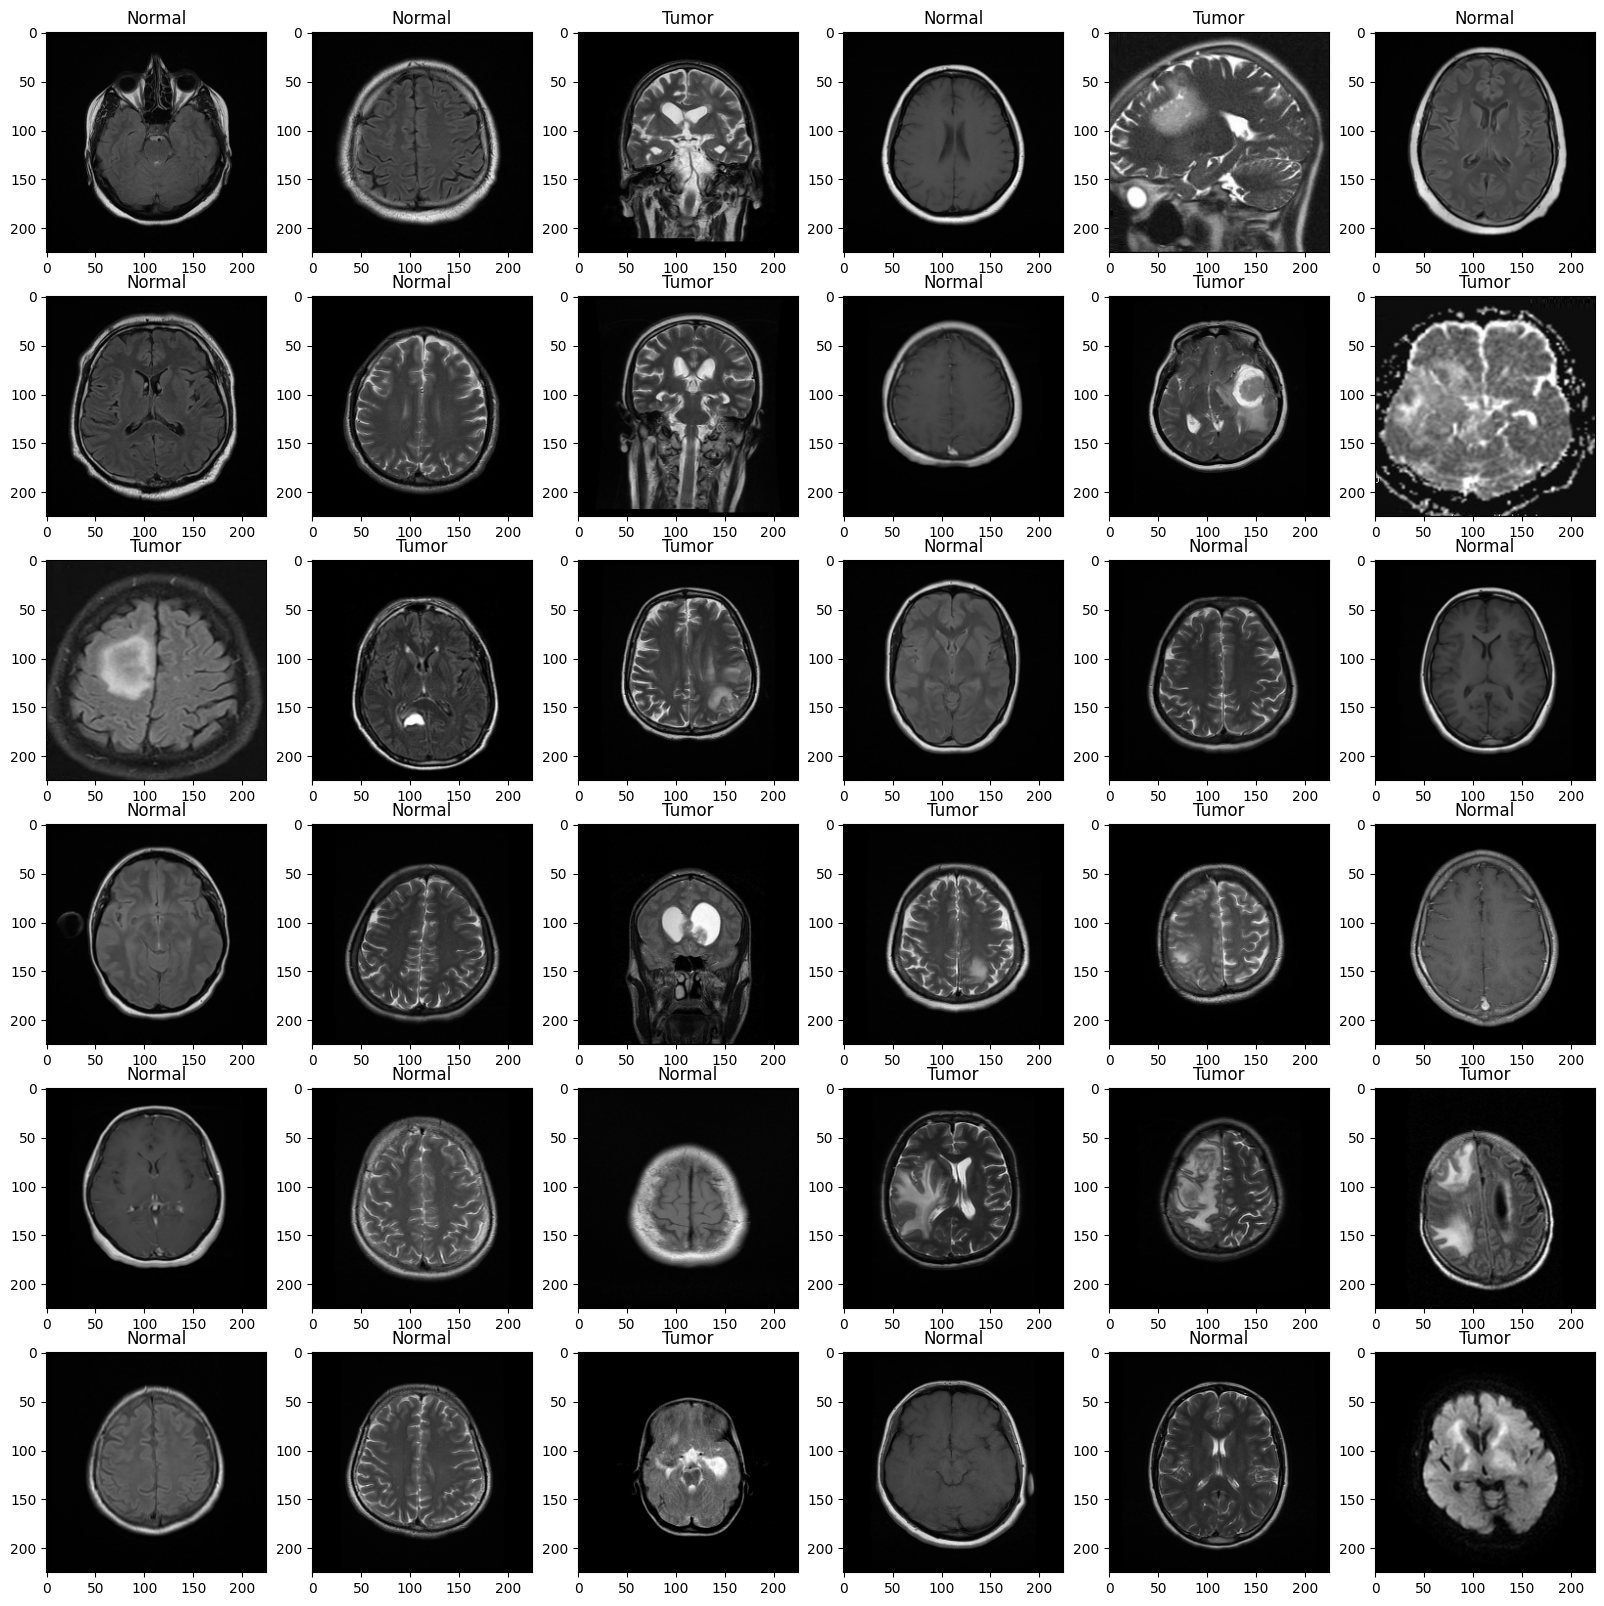

In [11]:
## plot image in train
plt.figure(figsize = (20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train) , 36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.title(getcheck(y_train[i]))


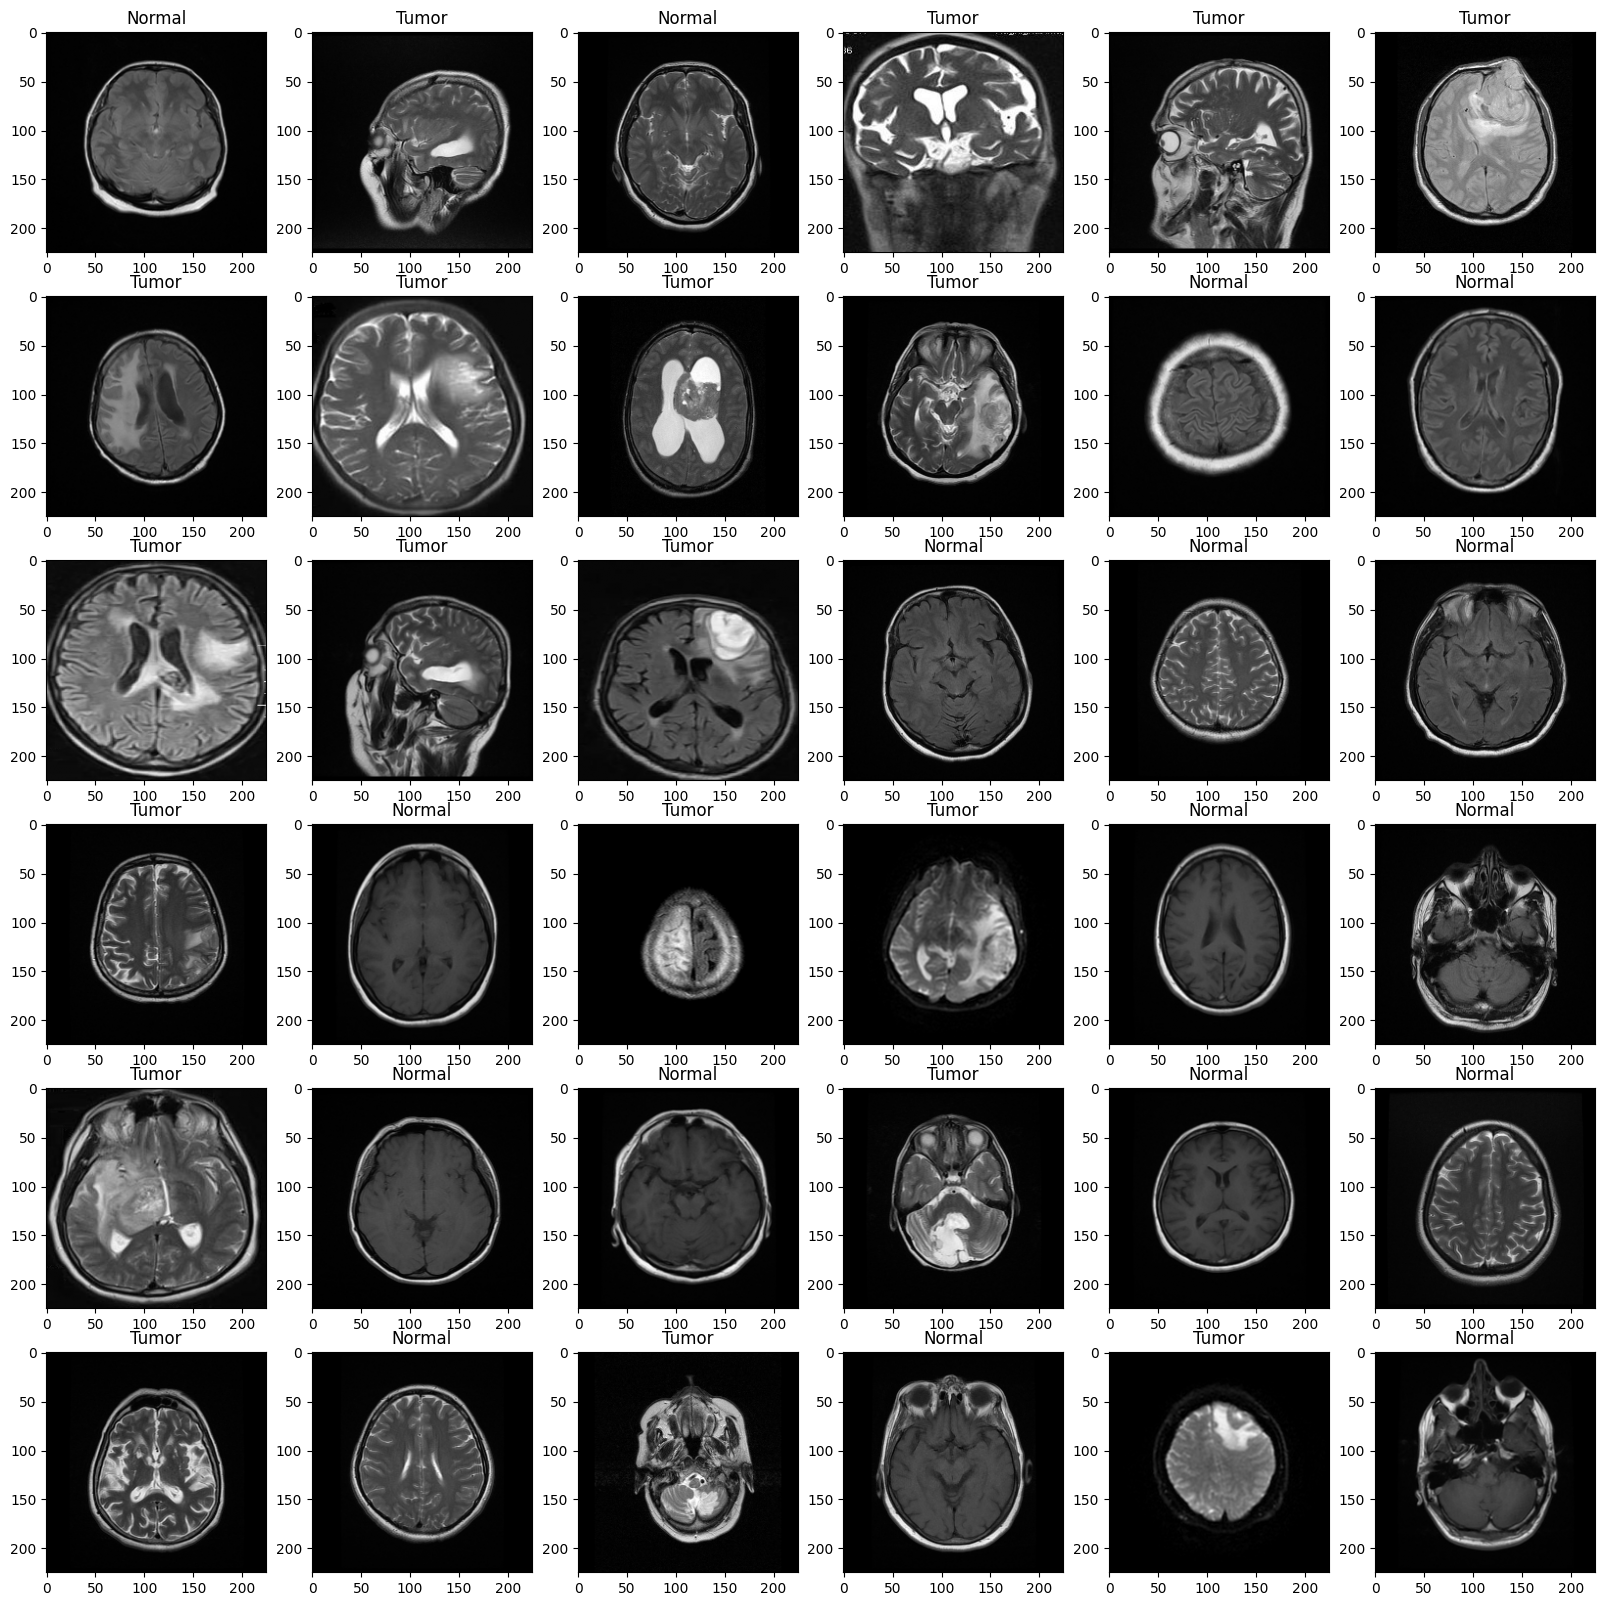

In [12]:
## show image in test
plt.figure(figsize = (20,20))
for n , i in enumerate(list(np.random.randint(0 , len(x_test) , 36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])
    plt.title(getcheck(y_test[i]))

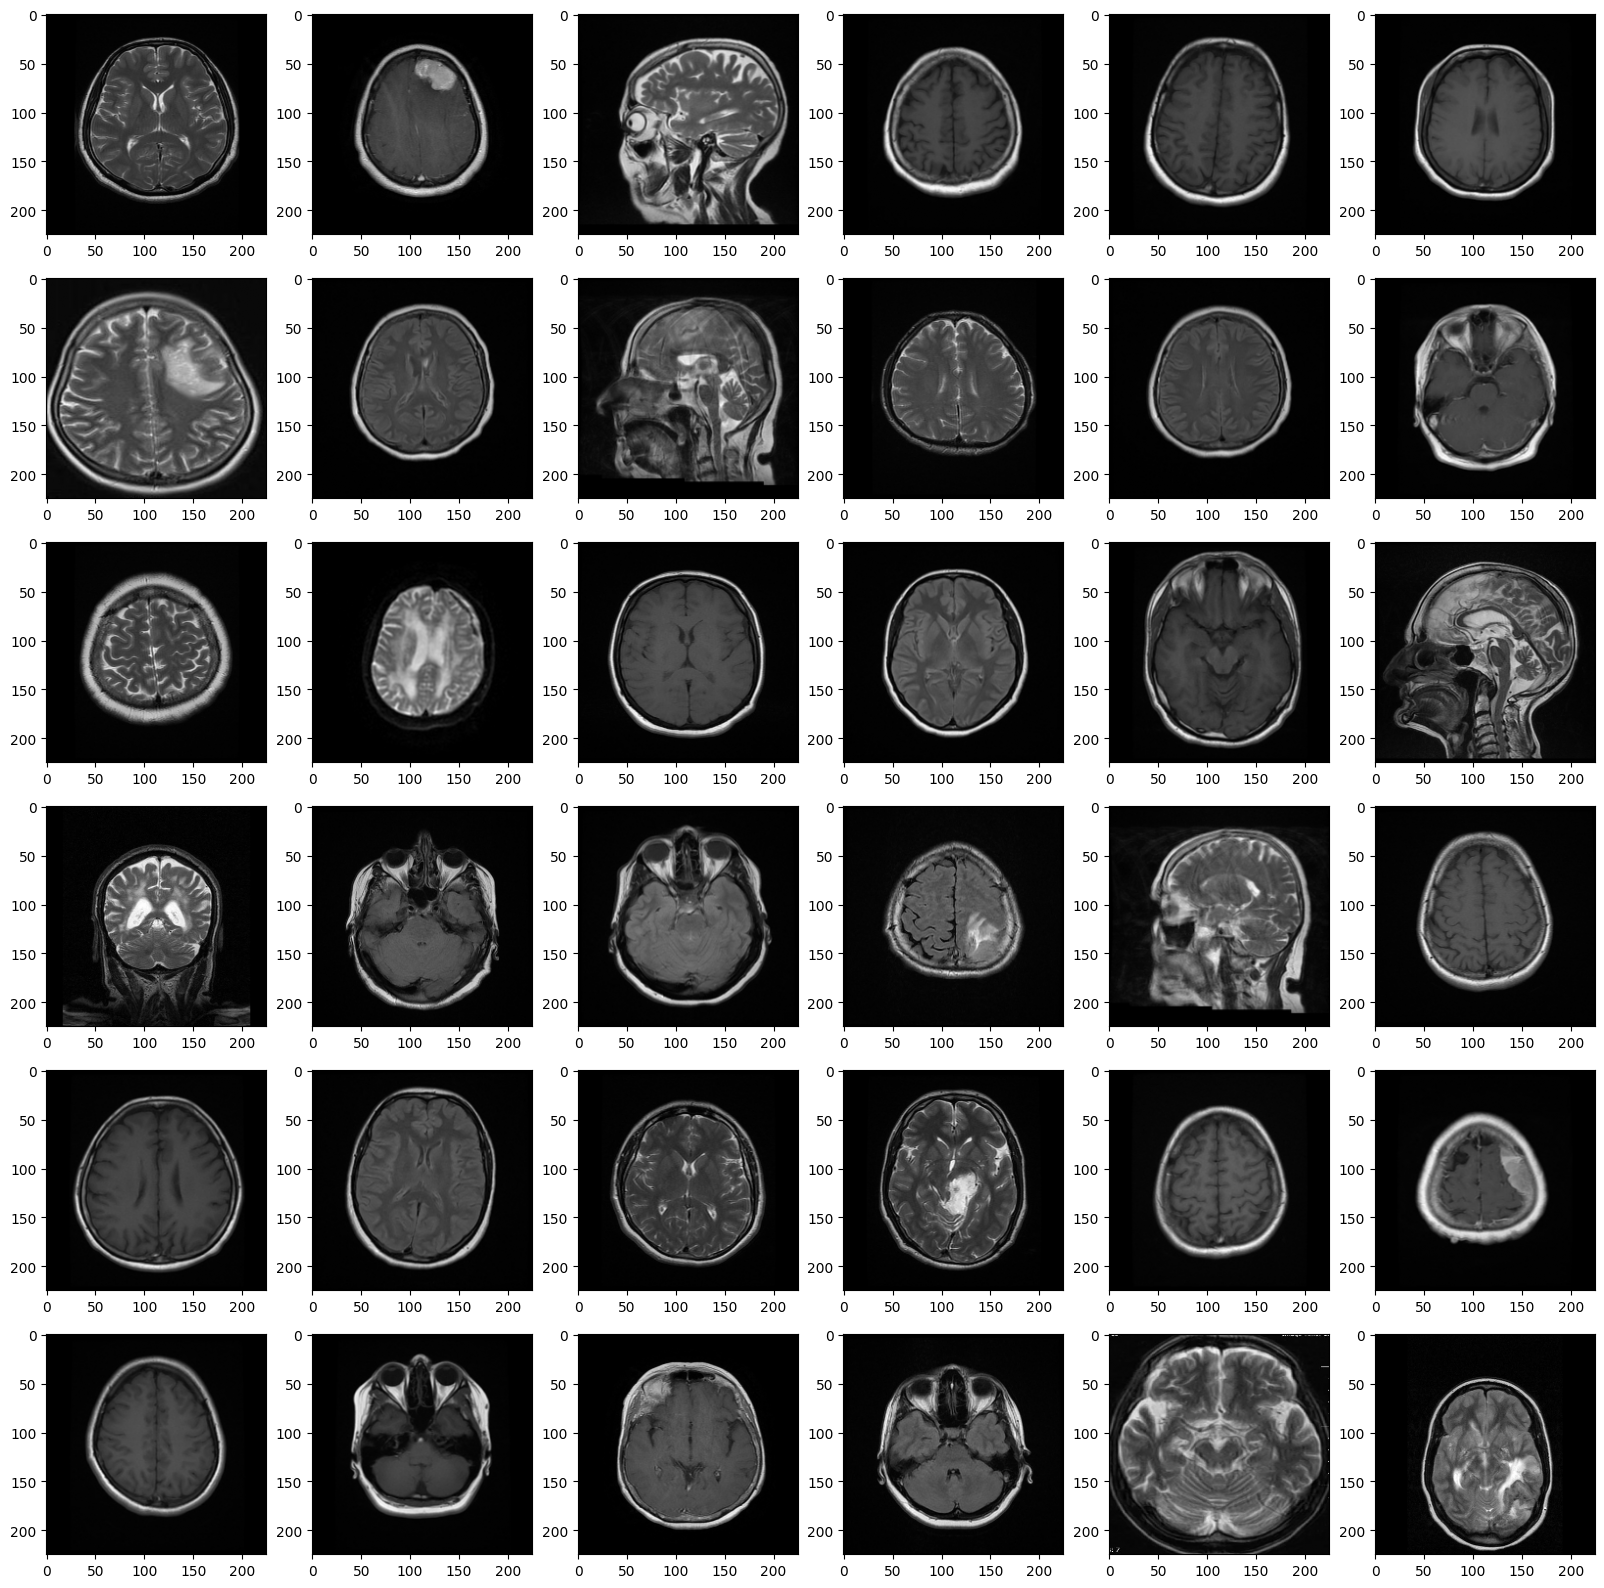

In [13]:
## show image in validation
plt.figure(figsize = (20,20))
for n , i in enumerate(list(np.random.randint(0 , len(x_val) , 36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_val[i])

In [14]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_val = np.array(x_val)
y_val = np.array(y_val)

print("x_train shape is " , x_train.shape)
print("x_test shape is " , x_test.shape)
print("y_train shape is " , y_train.shape)
print("y_test shape is " , y_test.shape)
print("x_val shape is " , x_val.shape)
print("y_val shape is " , y_val.shape)

x_train shape is  (4479, 225, 225, 3)
x_test shape is  (1400, 225, 225, 3)
y_train shape is  (4479,)
y_test shape is  (1400,)
x_val shape is  (1120, 225, 225, 3)
y_val shape is  (1120,)


In [15]:
## building model
model = Sequential([
    Conv2D(32 , (3,3) , activation = "relu" , input_shape = (s , s , 3)),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    Conv2D(64 , (3,3) , activation = "relu"),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    Conv2D(128 , (3,3) , activation = "relu"),
    MaxPooling2D((2,2)),
    Dropout(0.5),
    
    Flatten(),
    
    Dense(128 , activation = "relu"),
    Dropout(0.5),
    Dense(1 , activation = "sigmoid")
])

In [16]:
model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics = ["accuracy"])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 223, 223, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping
lr = ReduceLROnPlateau(monitor = "val_loss" , patience = 2 , factor = 0.5 , min_lr = 0.00001)
es = EarlyStopping(monitor = "val_loss" , patience = 2 , restore_best_weights = True)

In [19]:
history = model.fit(datagen.flow(x_train ,y_train , batch_size = 64) , validation_data = (x_val , y_val) , epochs = 20 , callbacks = [lr] , verbose = 1)

Epoch 1/20


I0000 00:00:1730058509.457885     814 service.cc:145] XLA service 0x7f24f000b2e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730058509.457945     814 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 2/70 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5312 - loss: 0.7731  

I0000 00:00:1730058518.703496     814 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


70/70 ━━━━━━━━━━━━━━━━━━━━ 79s 900ms/step - accuracy: 0.5881 - loss: 0.6989 - val_accuracy: 0.8786 - val_loss: 0.3225 - learning_rate: 0.0010
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 58s 738ms/step - accuracy: 0.8551 - loss: 0.3690 - val_accuracy: 0.8804 - val_loss: 0.2887 - learning_rate: 0.0010
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 737ms/step - accuracy: 0.8804 - loss: 0.3003 - val_accuracy: 0.9045 - val_loss: 0.2613 - learning_rate: 0.0010
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 58s 740ms/step - accuracy: 0.8916 - loss: 0.2776 - val_accuracy: 0.8402 - val_loss: 0.3661 - learning_rate: 0.0010
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 58s 743ms/step - accuracy: 0.9003 - loss: 0.2583 - val_accuracy: 0.9089 - val_loss: 0.2159 - learning_rate: 0.0010
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 57s 739ms/step - accuracy: 0.9260 - loss: 0.2026 - val_accuracy: 0.9438 - val_loss: 0.1320 - learning_rate: 0.0010
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 58s 740ms/step - accuracy: 0.9329 - loss: 0.1662 - val_

In [20]:
test_loss , test_accuracy = model.evaluate(x_test , y_test)
print("test accuracy is" , test_accuracy)
print("test_loss is" , test_loss)

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9891 - loss: 0.0562
test accuracy is 0.9842857122421265
test_loss is 0.06146134436130524


In [23]:
## predict model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os


def prepare_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0  
    return img_array


def predict_tumor(img_path):
    prepared_image = prepare_image(img_path)
    prediction = model.predict(prepared_image)
    
    if prediction[0][0] > 0.5:
        return "Tumor Detected"
    else:
        return "No Tumor Detected"


img_path = '/kaggle/input/classified-brain/brain.jpeg'  
result = predict_tumor(img_path)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tumor Detected
